# Ejemplo - clasificación mediante regresión logística de MNIST
*Ignacio Díaz Blanco, 2019-2023. Universidad de Oviedo*

### Descripción
En este ejemplo, se aplica regresión logística múltiple para clasificar la colección de dígitos manuscritos MNIST. El conjunto MNIST contiene imágenes de los dígitos $0-9$ con una resolución de $28\times 28$ píxeles, en niveles de gris. Cada imagen se puede considerar como un vector de tamaño $n=28\times 28 = 784$, que contiene los niveles de gris de cada pixel. 

Los datos para el problema de clasificación son los siguientes:
$$
\{(\mathbf x_i, c_i)\}_{i = \rm muestras\, de\, entrenamiento} \qquad  \mathbf x_i \in \mathbb R^{784}, \quad c_i \in \{0,1,2,3,4,5,6,7,8,9\}
$$ 

Veremos cómo el método de regresión logística, pese a ser simple (lineal), tiene unos resultados bastante buenos. 

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import  matplotlib.pyplot as plt
import numpy as np

# instanciamos un método LogisticRegression() de sklearn
a = LogisticRegression(max_iter=10000)


if not ('mnist' in locals()):
    print("cargando datos MNIST ...")
    mnist = fetch_openml('mnist_784',parser='auto')


print('Separando datos en entrenamiento y test')
X,Xt,y,yt = train_test_split(mnist.data,mnist.target,train_size=5000, test_size=100)

X  = np.array(X)
y  = np.array(y)
Xt = np.array(Xt)
yt = np.array(yt)

print("entrenando modelo de regresión logística")
a.fit(X,y.ravel())


ypred = a.predict(Xt)

cargando datos MNIST ...
Separando datos en entrenamiento y test
entrenando modelo de regresión logística


<Figure size 640x480 with 0 Axes>

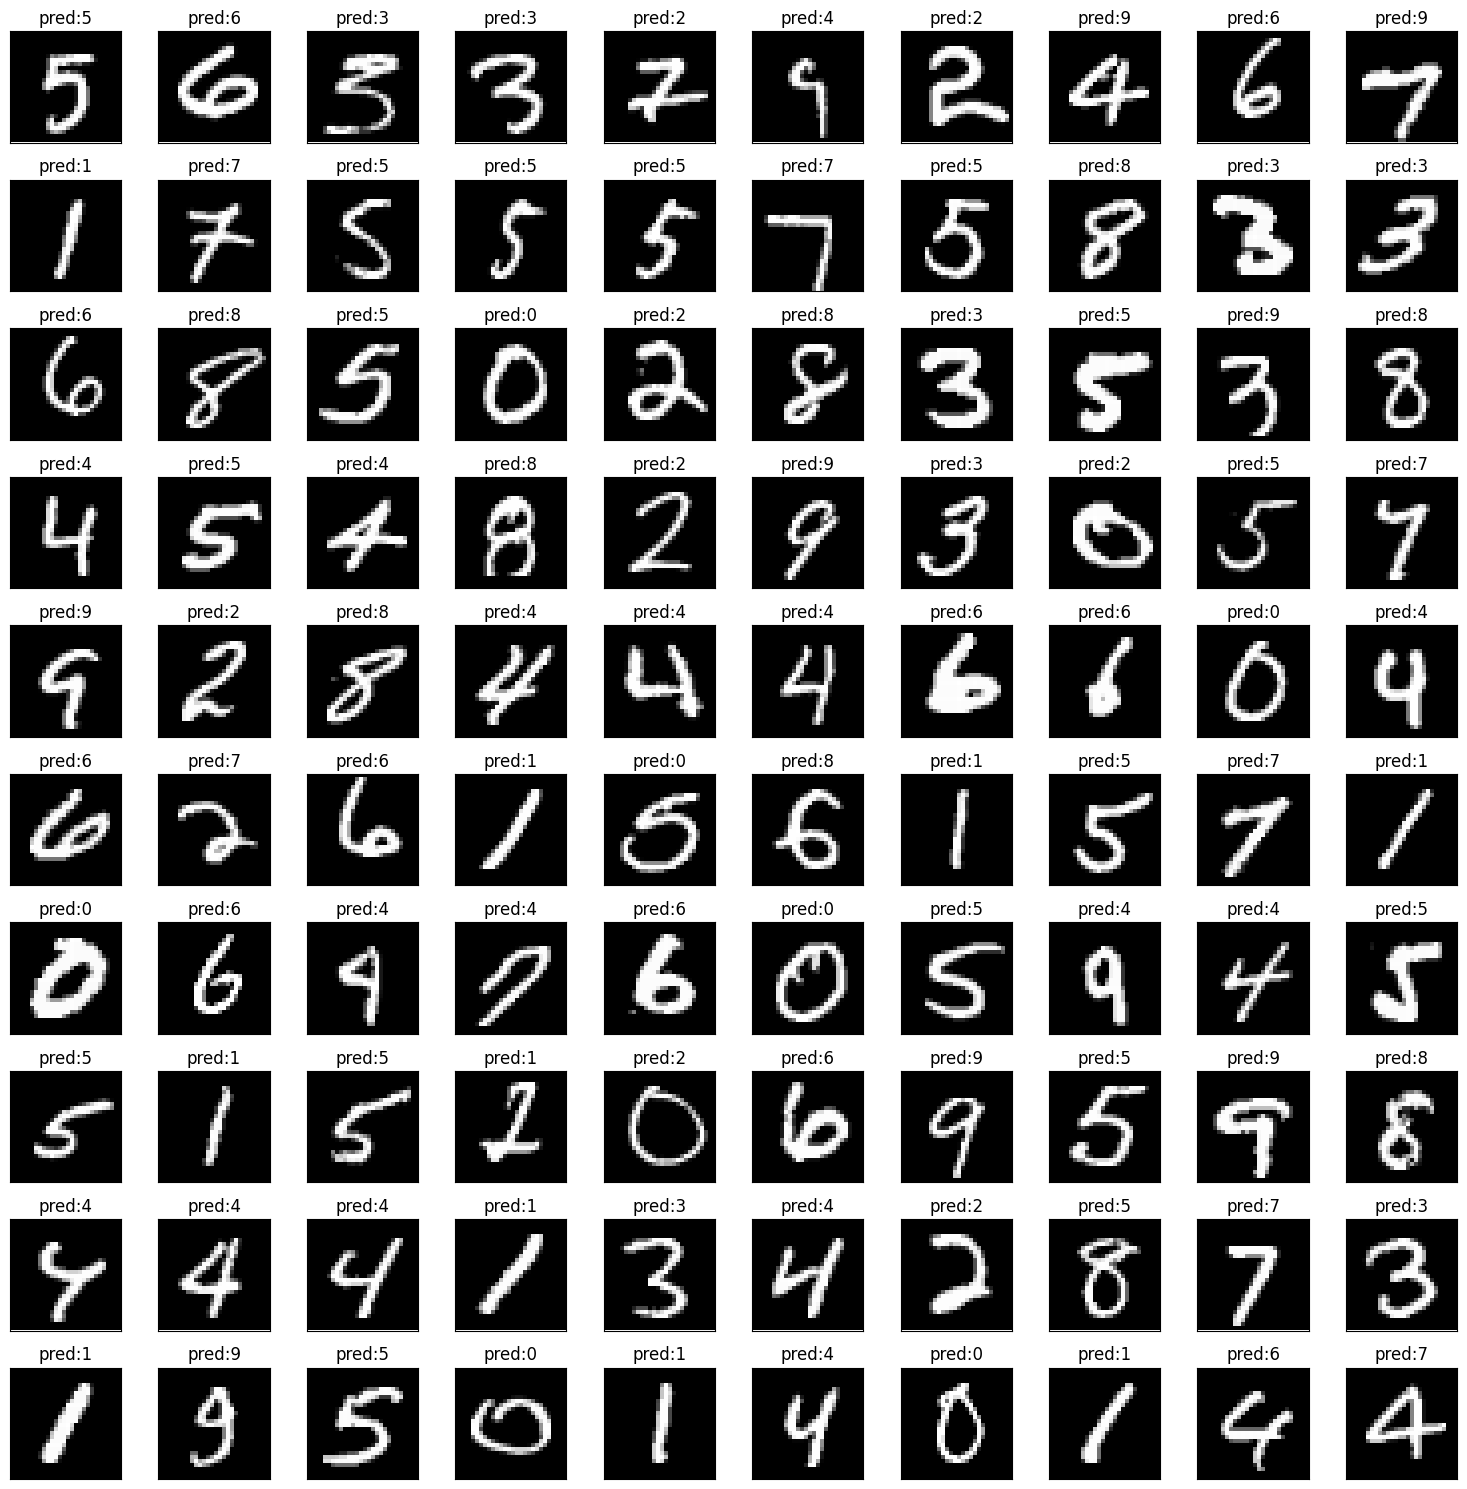

In [2]:
plt.ion()
import matplotlib.cm as cm
plt.set_cmap(cm.gray)
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(Xt[i,:].reshape(28,28))
    plt.title(f'pred:{ypred[i]}')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.draw()
plt.show()

In [3]:
from sklearn.metrics import accuracy_score

print(f'precisión = {accuracy_score(yt,ypred)}')

precisión = 0.84


<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Ejemplo - clasificación mediante regresión logística de MNIST</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://isa.uniovi.es/~idiaz" property="cc:attributionName" rel="cc:attributionURL">Ignacio Díaz Blanco</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Reconocimiento-CompartirIgual 4.0 Internacional License</a>.